**Nama**  : Dhaifan Satriaji

**ID Siswa** : M128X0209

**Kelas** : M06

# Importing Libraries

In [2]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [3]:
from google.colab import files
files.upload()

Saving Spotify-2000.csv to Spotify-2000.csv


{'Spotify-2000.csv': b'\xef\xbb\xbfIndex,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity\r\n1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71\r\n2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39\r\n3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69\r\n4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76\r\n5,Waitin\' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59\r\n6,The Road Ahead (Miles Of The Unknown),City To City,alternative pop rock,2004,99,46,54,-9,14,14,247,0,2,45\r\n7,She Will Be Loved,Maroon 5,pop,2002,102,71,71,-6,13,54,257,6,3,74\r\n8,Knights of Cydonia,Muse,modern rock,2006,137,96,37,-5,12,21,366,0,14,69\r\n9,Mr. Brightside,The Killers,modern rock,2004,148,92,36,-4,10,23,223,0,8,77\r\n10,Without Me,Eminem,detroit hip hop,2002,11

# Data Exploration

In [4]:
df_music = pd.read_csv('/content/Spotify-2000.csv')
print("Shape:", df_music.shape)
df_music.head()

Shape: (1994, 15)


,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


Deskripsi Variabel

In [5]:
df_music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

Menangani Missing Value

In [6]:
df_music.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         0
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

Korelasi Fitur

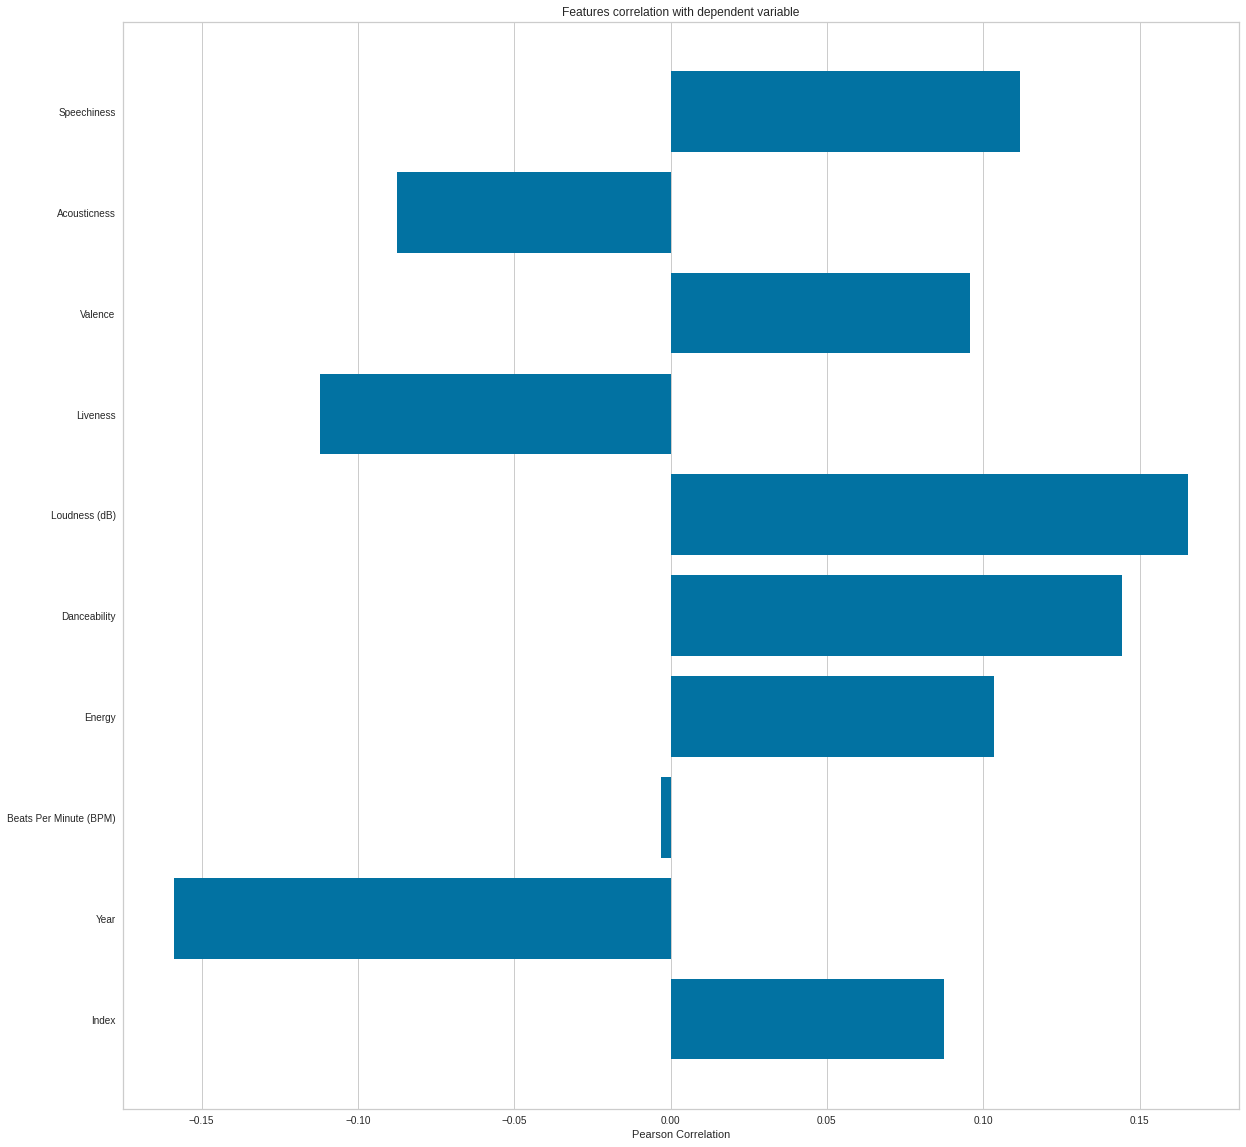

In [7]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['Index', 'Year', 'Beats Per Minute (BPM)', 'Energy', 'Danceability', 
                 'Loudness (dB)', 'Liveness', 'Valence', 'Acousticness','Speechiness']

X, y = df_music[feature_names], df_music['Popularity']

features = np.array(feature_names)

visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     
visualizer.show()

# Data Understanding

Music Over Time

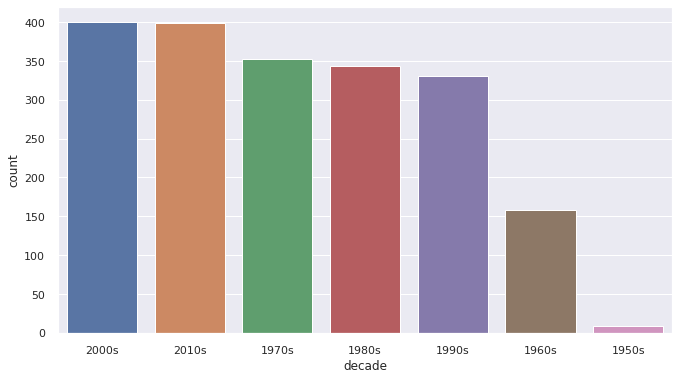

In [8]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

df_music['decade'] = df_music['Year'].apply(get_decade)

sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(df_music['decade'])

Fitur Sound

In [9]:
sound_features = ['Acousticness', 'Danceability', 'Energy', 'Liveness', 'Speechiness', 'Valence']
fig = px.line(df_music, x='Year', y=sound_features)
fig.show()

Characteristics of Different Genres

In [10]:
top10_genres = df_music.nlargest(10, 'Popularity')

fig = px.bar(top10_genres, x='Top Genre', y=['Valence', 'Energy', 'Danceability', 'Acousticness'], barmode='group')
fig.show()

Clustering Genres with K-Means

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = df_music.select_dtypes(np.number)
cluster_pipeline.fit(X)
df_music['cluster'] = cluster_pipeline.predict(X)

In [12]:
from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['Top Genre'] = df_music['Top Genre']
projection['cluster'] = df_music['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'Top Genre'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1994 samples in 0.010s...
[t-SNE] Computed neighbors for 1994 samples in 0.378s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1994
[t-SNE] Computed conditional probabilities for sample 1994 / 1994
[t-SNE] Mean sigma: 0.937004
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.671463
[t-SNE] KL divergence after 1000 iterations: 1.407306


Clustering Songs with K-Means

In [13]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=20, 
                                   verbose=False))
                                 ], verbose=False)

X = df_music.select_dtypes(np.number)
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)
song_cluster_labels = song_cluster_pipeline.predict(X)
df_music['cluster_label'] = song_cluster_labels

In [14]:
from sklearn.decomposition import PCA

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['Title'] = df_music['Title']
projection['cluster'] = df_music['cluster_label']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'Title'])
fig.show()

Build Recommender System

In [16]:
from sklearn.preprocessing import normalize
df_music['song_id']=df_music.index
df = df_music[["Acousticness", 'Danceability', 'Energy', "Liveness", "Speechiness", "Valence"]]
df.index = df_music['song_id']

df_normalized = pd.DataFrame(normalize(df, axis=1))
df_normalized.columns = df.columns
df_normalized.index = df.index
df_normalized.head()

,Acousticness,Danceability,Energy,Liveness,Speechiness,Valence
song_id,,,,,,
0,0.714689,0.402963,0.228092,0.083634,0.022809,0.517009
1,0.134696,0.396165,0.625940,0.134696,0.055463,0.641787
2,0.018135,0.598444,0.625646,0.063471,0.154145,0.471501
3,0.000000,0.385236,0.860062,0.026877,0.035836,0.331482
4,0.007502,0.435132,0.615187,0.075023,0.022507,0.652698


In [22]:
"""
Music Recommender based on different distance calculation approaches

df_normalized: normalized song data
distance_method: distance calculation approach: e.g. cosine, euclidean, hamming
song_id: find similar songs based on the selected song
N: Top N song(s)

return 1) song data of selected song and Top N recommendation, 
2) song id and song name of Top N recommendation
"""

from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import cosine, euclidean, hamming
def Content_filter_music_recommender(song_id, N):
    distance_method = cosine
    allSongs = pd.DataFrame(df_normalized.index)
    allSongs = allSongs[allSongs.song_id != song_id]
    allSongs["distance"] = allSongs["song_id"].apply(lambda x: distance_method(df_normalized.loc[song_id], df_normalized.loc[x]))
    # sort by distance then recipe id, the smaller value of recipe id will be picked. 
    TopNRecommendation = allSongs.sort_values(["distance"]).head(N).sort_values(by=['distance', 'song_id'])
    #print(data['name'].loc[song_id, :])
    Recommendation = pd.merge(TopNRecommendation , df_music, how='inner', on='song_id')
    SongName = Recommendation['Title']
    return SongName

In [21]:
SongName=Content_filter_music_recommender(3, 5)
SongName

0                  Remedy
1                Everlong
2                    Ruby
3    Let Me Entertain You
4            Plug in Baby
Name: Title, dtype: object